<a href="https://colab.research.google.com/github/nataliasus121-source/Python_Project/blob/main/Exploratory_data_analysis_for_online_store.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

In [ ]:
# Connecting Google Drive
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Changing work folder
%cd /content/drive/MyDrive/Mate_homework

/content/drive/MyDrive/Mate_homework


# **Data overview.**

In [ ]:
# Uploading dataset
df_countries = pd.read_csv("countries.csv")
df_countries.head()



,name,alpha-2,alpha-3,region,sub-region
0,Afghanistan,AF,AFG,Asia,Southern Asia
1,Åland Islands,AX,ALA,Europe,Northern Europe
2,Albania,AL,ALB,Europe,Southern Europe
3,Algeria,DZ,DZA,Africa,Northern Africa
4,American Samoa,AS,ASM,Oceania,Polynesia


In [ ]:
df_events = pd.read_csv("events.csv")
df_events.head()



,Order ID,Order Date,Ship Date,Order Priority,Country Code,Product ID,Sales Channel,Units Sold,Unit Price,Unit Cost
0,100640618,10/8/2014,10/18/2014,M,NOR,2103,Online,650.0,205.70,117.11
1,100983083,8/11/2016,8/11/2016,C,SRB,2103,Offline,1993.0,205.70,117.11
2,101025998,7/18/2014,8/11/2014,M,NaN,7940,Online,4693.0,668.27,502.54
3,102230632,5/13/2017,6/13/2017,L,MNE,2455,Online,1171.0,109.28,35.84
4,103435266,8/11/2012,9/18/2012,H,SRB,1270,Offline,7648.0,47.45,31.79


In [ ]:
df_products = pd.read_csv("products.csv")
df_products.head()

,id,item_type
0,2103,Cereal
1,7940,Household
2,2455,Clothes
3,1270,Beverages
4,8681,Office Supplies




### **Table: countries**

This table contains information about countries, including:

* **name** – the name of the country
* **alpha2**, **alpha3** – two- and three-letter country codes
* **region**, **sub-region** – the region and sub-region to which each country belongs

The **countries** table is joined with the **events** table using the fields **alpha3** (from *countries*) and **Country Code** (from *events*).

---

### **Table: events**

This table contains detailed information about sales events, including:

* **Order ID** – unique order identifier
* **Order Date** – date when the order was placed
* **Ship Date** – date when the order was shipped
* **Order Priority** – priority assigned to the order
* **Country Code** – three-letter country code
* **Product ID** – identifier of the product
* **Sales Channel** – sales channel used
* **Units Sold** – number of units sold
* **Unit Price** – price per unit
* **Unit Cost** – cost per unit

The **events** table is joined with the **countries** table using **Country Code** = **alpha3**, and with the **products** table using **Product ID** = **ID**.

---

### **Table: products**

This table contains product information:

* **id** – product identifier
* **item_type** – category or type of the product

It connects to the **events** table through **Product ID** (events) = **id** (products).


# **Data cleaning.**

In [ ]:
# Quantity of rows and columns in datasets
print("Table countries:", df_countries.shape)
print("Table events:", df_events.shape)
print("Table products:", df_products.shape)

Table countries: (249, 5)
Table events: (1330, 10)
Table products: (12, 2)


In [ ]:
#Quantity of missing values
print("Table countries:", "\n", df_countries.isna().sum())
print("\n", "\n", "Table events:", "\n", df_events.isna().sum())
print("\n", "\n", "Table products:", "\n", df_products.isna().sum())


Table countries: 
 name          0
alpha-2       1
alpha-3       0
region        1
sub-region    1
dtype: int64

 
 Table events: 
 Order ID           0
Order Date         0
Ship Date          0
Order Priority     0
Country Code      82
Product ID         0
Sales Channel      0
Units Sold         2
Unit Price         0
Unit Cost          0
dtype: int64

 
 Table products: 
 id           0
item_type    0
dtype: int64


In [ ]:
#Persentage of missing values
print("Table countries:", "\n", df_countries.isna().sum() / df_countries.shape[0] * 100)
print("\n", "\n", "Table events:", "\n", df_events.isna().sum() / df_events.shape[0] * 100)
print("\n", "\n", "Table products:", "\n", df_products.isna().sum() / df_products.shape[0] * 100)

Table countries: 
 name          0.000000
alpha-2       0.401606
alpha-3       0.000000
region        0.401606
sub-region    0.401606
dtype: float64

 
 Table events: 
 Order ID          0.000000
Order Date        0.000000
Ship Date         0.000000
Order Priority    0.000000
Country Code      6.165414
Product ID        0.000000
Sales Channel     0.000000
Units Sold        0.150376
Unit Price        0.000000
Unit Cost         0.000000
dtype: float64

 
 Table products: 
 id           0.0
item_type    0.0
dtype: float64


In [ ]:
# Analisys of missing values
df_countries[df_countries["alpha-2"].isna()]

,name,alpha-2,alpha-3,region,sub-region
153,Namibia,NaN,NAM,Africa,Sub-Saharan Africa


In [ ]:
# Assigning the value of "alpha-2" for the country of Namibia
df_countries.loc[df_countries["alpha-3"] == "NAM", "alpha-2"] = "NA"


In [ ]:
df_countries[df_countries["alpha-2"].isna()]

,name,alpha-2,alpha-3,region,sub-region


In [ ]:
df_countries[df_countries["region"].isna()]

,name,alpha-2,alpha-3,region,sub-region
8,Antarctica,AQ,ATA,NaN,NaN


In [ ]:
df_countries[df_countries["sub-region"].isna()]

,name,alpha-2,alpha-3,region,sub-region
8,Antarctica,AQ,ATA,NaN,NaN


In [ ]:
#Delete rows that contain omitted value in countries dataframe
df_countries = df_countries.dropna()

# filling gaps in the events dataframe in the "Country Code" column with the "Unknown"
df_events.fillna({"Country Code": "Unknown"}, inplace=True)

#filling gaps in the events dataframe in the "Units Sold" column with the на median value
df_events.fillna({"Units Sold": df_events["Units Sold"].median()}, inplace=True)

In [ ]:
#Persentage of missing values in the dataframes after working with missing values
print("Table countries:", "\n", df_countries.isna().sum() / df_countries.shape[0] * 100)
print("\n", "\n", "Table events:", "\n", df_events.isna().sum() / df_events.shape[0] * 100)
print("\n", "\n", "Table products:", "\n", df_products.isna().sum() / df_products.shape[0] * 100)

Table countries: 
 name          0.0
alpha-2       0.0
alpha-3       0.0
region        0.0
sub-region    0.0
dtype: float64

 
 Table events: 
 Order ID          0.0
Order Date        0.0
Ship Date         0.0
Order Priority    0.0
Country Code      0.0
Product ID        0.0
Sales Channel     0.0
Units Sold        0.0
Unit Price        0.0
Unit Cost         0.0
dtype: float64

 
 Table products: 
 id           0.0
item_type    0.0
dtype: float64




* In the **countries** table, the value in the *alpha-2* column for **Namibia** was incorrectly interpreted by Pandas as **NaN**, even though the correct code should be **“NA”**. To fix this issue, the proper value was manually assigned.

* The missing values in the *region* and *sub-region* columns corresponded to **Antarctica**, which is not a relevant country for product sales. Therefore, these rows were removed from the dataset.

* In the **events** table, missing values in the *Country Code* column were replaced with **“Unknown”**, since the proportion of missing records was relatively large. Missing values in *Units Sold* were filled using the **median**, which is less sensitive to outliers and thus minimizes the impact on subsequent statistical calculations.


In [ ]:
#General information about datasets
df_countries.info()
df_events.info()
df_products.info()

<class 'pandas.core.frame.DataFrame'>
Index: 248 entries, 0 to 248
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        248 non-null    object
 1   alpha-2     248 non-null    object
 2   alpha-3     248 non-null    object
 3   region      248 non-null    object
 4   sub-region  248 non-null    object
dtypes: object(5)
memory usage: 11.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order ID        1330 non-null   int64  
 1   Order Date      1330 non-null   object 
 2   Ship Date       1330 non-null   object 
 3   Order Priority  1330 non-null   object 
 4   Country Code    1330 non-null   object 
 5   Product ID      1330 non-null   int64  
 6   Sales Channel   1330 non-null   object 
 7   Units Sold      1330 non-null   float64
 8   Unit Price      13

In [ ]:
#Types of data in the datasets
print("Table countries:", "\n", df_countries.dtypes)
print("\n", "\n", "Table events:", "\n", df_events.dtypes)
print("\n", "\n", "Table products:", "\n", df_products.dtypes)

Table countries: 
 name          object
alpha-2       object
alpha-3       object
region        object
sub-region    object
dtype: object

 
 Table events: 
 Order ID            int64
Order Date         object
Ship Date          object
Order Priority     object
Country Code       object
Product ID          int64
Sales Channel      object
Units Sold        float64
Unit Price        float64
Unit Cost         float64
dtype: object

 
 Table products: 
 id            int64
item_type    object
dtype: object


The **Order Date** and **Ship Date** columns have the incorrect data
type.

In [ ]:
#Converting the type of data for "Order Date" and "Ship Date" columns
df_events["Order Date"] = pd.to_datetime(df_events["Order Date"])
df_events["Ship Date"] = pd.to_datetime(df_events["Ship Date"])

In [ ]:
print(df_events.dtypes)

Order ID                   int64
Order Date        datetime64[ns]
Ship Date         datetime64[ns]
Order Priority            object
Country Code              object
Product ID                 int64
Sales Channel             object
Units Sold               float64
Unit Price               float64
Unit Cost                float64
dtype: object


In [ ]:
#Checking for dublicates
duplicate_rows = df_countries.duplicated()
print(duplicate_rows)
print("Table countries:", duplicate_rows.sum())

duplicate_rows = df_events.duplicated()
print("\n","\n",duplicate_rows)
print("Table events:", duplicate_rows.sum())

duplicate_rows = df_products.duplicated()
print("\n","\n",duplicate_rows)
print("Table products:", duplicate_rows.sum())

0      False
1      False
2      False
3      False
4      False
       ...  
244    False
245    False
246    False
247    False
248    False
Length: 248, dtype: bool
Table countries: 0

 
 0       False
1       False
2       False
3       False
4       False
        ...  
1325    False
1326    False
1327    False
1328    False
1329    False
Length: 1330, dtype: bool
Table events: 0

 
 0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
dtype: bool
Table products: 0


The sum of logical values is 0, which means that all values are False. Therefore, **duplicate values are absent**.

In [ ]:
#Examining data for anomalies.
df_events.describe()


,Order ID,Order Date,Ship Date,Product ID,Units Sold,Unit Price,Unit Cost
count,1.330000e+03,1330,1330,1330.000000,1330.000000,1330.000000,1330.000000
mean,5.412048e+08,2013-10-12 06:09:12.180451072,2013-11-06 00:46:33.383458816,5788.096241,4952.216541,264.893541,187.246812
min,1.006406e+08,2010-01-01 00:00:00,2010-01-10 00:00:00,1270.000000,2.000000,9.330000,6.920000
25%,3.190004e+08,2011-12-16 06:00:00,2012-01-03 00:00:00,3127.000000,2360.750000,81.730000,35.840000
50%,5.387164e+08,2013-10-17 00:00:00,2013-11-09 00:00:00,5988.000000,4962.000000,154.060000,97.440000
75%,7.544628e+08,2015-08-28 18:00:00,2015-10-03 18:00:00,8681.000000,7458.750000,437.200000,263.330000
max,9.998797e+08,2017-07-23 00:00:00,2017-08-31 00:00:00,8969.000000,9999.000000,668.270000,524.960000
std,2.573882e+08,NaN,NaN,2820.728878,2903.012194,217.323460,176.158873


In [ ]:
#Searching for anomalies with Z-Score
z_score_units=(df_events["Units Sold"] - df_events["Units Sold"].median()) / df_events["Units Sold"].std()
q1=(z_score_units.abs() > 3).sum()
print("Quantity of anomal Units Sold values according to Z-Score:", q1)

z_score_price=(df_events["Unit Price"] - df_events["Unit Price"].median()) / df_events["Unit Price"].std()
q2=(z_score_price.abs() > 3).sum()
print("Quantity of anomal Unit Price values according to Z-Score:", q2)

z_score_cost=(df_events["Unit Cost"] - df_events["Unit Cost"].median()) / df_events["Unit Cost"].std()
q3=(z_score_cost.abs() > 3).sum()
print("Quantity of anomal Units Cost values according to Z-Score:", q3)

Quantity of anomal Units Sold values according to Z-Score: 0
Quantity of anomal Unit Price values according to Z-Score: 0
Quantity of anomal Units Cost values according to Z-Score: 0



According to the results of descriptive statistics and additional calculations of the Z-score, **the anomalies are not revealed.**


# **Data analysis and visualization.**

In [ ]:
#Joining of three dataframes
df_events_products = pd.merge(df_events, df_products, left_on="Product ID", right_on="id", how="left")
df_events_products_countries = pd.merge(df_events_products, df_countries, left_on="Country Code", right_on="alpha-3", how="left")
df_events_products_countries.head()

,Order ID,Order Date,Ship Date,Order Priority,Country Code,Product ID,Sales Channel,Units Sold,Unit Price,Unit Cost,id,item_type,name,alpha-2,alpha-3,region,sub-region
0,100640618,2014-10-08,2014-10-18,M,NOR,2103,Online,650.0,205.70,117.11,2103,Cereal,Norway,NO,NOR,Europe,Northern Europe
1,100983083,2016-08-11,2016-08-11,C,SRB,2103,Offline,1993.0,205.70,117.11,2103,Cereal,Serbia,RS,SRB,Europe,Southern Europe
2,101025998,2014-07-18,2014-08-11,M,Unknown,7940,Online,4693.0,668.27,502.54,7940,Household,NaN,NaN,NaN,NaN,NaN
3,102230632,2017-05-13,2017-06-13,L,MNE,2455,Online,1171.0,109.28,35.84,2455,Clothes,Montenegro,ME,MNE,Europe,Southern Europe
4,103435266,2012-08-11,2012-09-18,H,SRB,1270,Offline,7648.0,47.45,31.79,1270,Beverages,Serbia,RS,SRB,Europe,Southern Europe


In [ ]:
#To eliminate NaN values in the joining table, added the country "Unknown" in the "countries" table
df_countries.loc[len(df_countries.index)] = ["Unknown", "Unknown", "Unknown", "Unknown", "Unknown"]
df_countries.tail()

,name,alpha-2,alpha-3,region,sub-region
244,Wallis and Futuna,WF,WLF,Oceania,Polynesia
245,Western Sahara,EH,ESH,Africa,Northern Africa
246,Yemen,YE,YEM,Asia,Western Asia
247,Zambia,ZM,ZMB,Africa,Sub-Saharan Africa
248,Unknown,Unknown,Unknown,Unknown,Unknown


In [ ]:
#Rejoining of three tables after adding the Unknown country
df_events_products = pd.merge(df_events, df_products, left_on="Product ID", right_on="id", how="left")
df_events_products_countries = pd.merge(df_events_products, df_countries, left_on="Country Code", right_on="alpha-3", how="left")
df_events_products_countries.head()

,Order ID,Order Date,Ship Date,Order Priority,Country Code,Product ID,Sales Channel,Units Sold,Unit Price,Unit Cost,id,item_type,name,alpha-2,alpha-3,region,sub-region
0,100640618,2014-10-08,2014-10-18,M,NOR,2103,Online,650.0,205.70,117.11,2103,Cereal,Norway,NO,NOR,Europe,Northern Europe
1,100983083,2016-08-11,2016-08-11,C,SRB,2103,Offline,1993.0,205.70,117.11,2103,Cereal,Serbia,RS,SRB,Europe,Southern Europe
2,101025998,2014-07-18,2014-08-11,M,Unknown,7940,Online,4693.0,668.27,502.54,7940,Household,Unknown,Unknown,Unknown,Unknown,Unknown
3,102230632,2017-05-13,2017-06-13,L,MNE,2455,Online,1171.0,109.28,35.84,2455,Clothes,Montenegro,ME,MNE,Europe,Southern Europe
4,103435266,2012-08-11,2012-09-18,H,SRB,1270,Offline,7648.0,47.45,31.79,1270,Beverages,Serbia,RS,SRB,Europe,Southern Europe


In [ ]:
#Removing redundant columns
df_events_products_countries=df_events_products_countries.drop(["id", "alpha-3"], axis=1)
df_events_products_countries.head()

,Order ID,Order Date,Ship Date,Order Priority,Country Code,Product ID,Sales Channel,Units Sold,Unit Price,Unit Cost,item_type,name,alpha-2,region,sub-region
0,100640618,2014-10-08,2014-10-18,M,NOR,2103,Online,650.0,205.70,117.11,Cereal,Norway,NO,Europe,Northern Europe
1,100983083,2016-08-11,2016-08-11,C,SRB,2103,Offline,1993.0,205.70,117.11,Cereal,Serbia,RS,Europe,Southern Europe
2,101025998,2014-07-18,2014-08-11,M,Unknown,7940,Online,4693.0,668.27,502.54,Household,Unknown,Unknown,Unknown,Unknown
3,102230632,2017-05-13,2017-06-13,L,MNE,2455,Online,1171.0,109.28,35.84,Clothes,Montenegro,ME,Europe,Southern Europe
4,103435266,2012-08-11,2012-09-18,H,SRB,1270,Offline,7648.0,47.45,31.79,Beverages,Serbia,RS,Europe,Southern Europe


In [ ]:
#Rename of the table columns
df_events_products_countries.rename(
    columns={
        "name": "Country",
        "alpha-2": "Country Code 2",
        "item_type": "Category",
        "sub-region": "sub_region"
    },
    inplace=True
)


In [ ]:
df_events_products_countries.columns = (
    df_events_products_countries.columns
        .str.lower()
        .str.replace(" ", "_")
)


In [ ]:
df_events_products_countries.head()

,order_id,order_date,ship_date,order_priority,country_code,product_id,sales_channel,units_sold,unit_price,unit_cost,category,country,country_code_2,region,sub_region
0,100640618,2014-10-08,2014-10-18,M,NOR,2103,Online,650.0,205.70,117.11,Cereal,Norway,NO,Europe,Northern Europe
1,100983083,2016-08-11,2016-08-11,C,SRB,2103,Offline,1993.0,205.70,117.11,Cereal,Serbia,RS,Europe,Southern Europe
2,101025998,2014-07-18,2014-08-11,M,Unknown,7940,Online,4693.0,668.27,502.54,Household,Unknown,Unknown,Unknown,Unknown
3,102230632,2017-05-13,2017-06-13,L,MNE,2455,Online,1171.0,109.28,35.84,Clothes,Montenegro,ME,Europe,Southern Europe
4,103435266,2012-08-11,2012-09-18,H,SRB,1270,Offline,7648.0,47.45,31.79,Beverages,Serbia,RS,Europe,Southern Europe


In [ ]:
#Key company performance metrics

#Total number of orders
print("Total number of orders:", df_events_products_countries["order_id"].nunique())

#Total revenue
df_events_products_countries['total_revenue'] = df_events_products_countries['unit_price'] * df_events_products_countries['units_sold']
total_revenue = df_events_products_countries['total_revenue'].sum()
print("Total revenue:", total_revenue)

#Total costs
df_events_products_countries['total_cost'] = df_events_products_countries['unit_cost'] * df_events_products_countries['units_sold']
total_cost = df_events_products_countries['total_cost'].sum()
print("Total costs:", total_cost)

#Total profit
total_profit = total_revenue - total_cost
print("Total profit:", total_profit)

#Total countries covered
total_countries_covered = df_events_products_countries["country"].nunique()

# Exclude 'Unknown' if it was added as a placeholder for missing country codes
if 'unknown' in df_events_products_countries['country'].str.lower().unique():
    total_countries_covered -= 1
print("Total countries covered:", total_countries_covered)

Total number of orders: 1330
Total revenue: 1704628370.65
Total costs: 1202785737.5299997
Total profit: 501842633.12000036
Total countries covered: 45


In [ ]:
df_events_products_countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        1330 non-null   int64         
 1   order_date      1330 non-null   datetime64[ns]
 2   ship_date       1330 non-null   datetime64[ns]
 3   order_priority  1330 non-null   object        
 4   country_code    1330 non-null   object        
 5   product_id      1330 non-null   int64         
 6   sales_channel   1330 non-null   object        
 7   units_sold      1330 non-null   float64       
 8   unit_price      1330 non-null   float64       
 9   unit_cost       1330 non-null   float64       
 10  category        1330 non-null   object        
 11  country         1330 non-null   object        
 12  country_code_2  1330 non-null   object        
 13  region          1330 non-null   object        
 14  sub_region      1330 non-null   object        
 15  tota

## **Key company performance metrics 2010 - 2017**

**Total number of order**s: 1330

**Total revenue**: 1704628370.65 USD

**Total costs**: 1202785737.53 USD

**Total profit**: 501842633.12 USD

**Total countries covered** (exclude "Uknown"): 45

## **Sales Analysis (revenue, costs, profits, product popularity) by Product Category.**


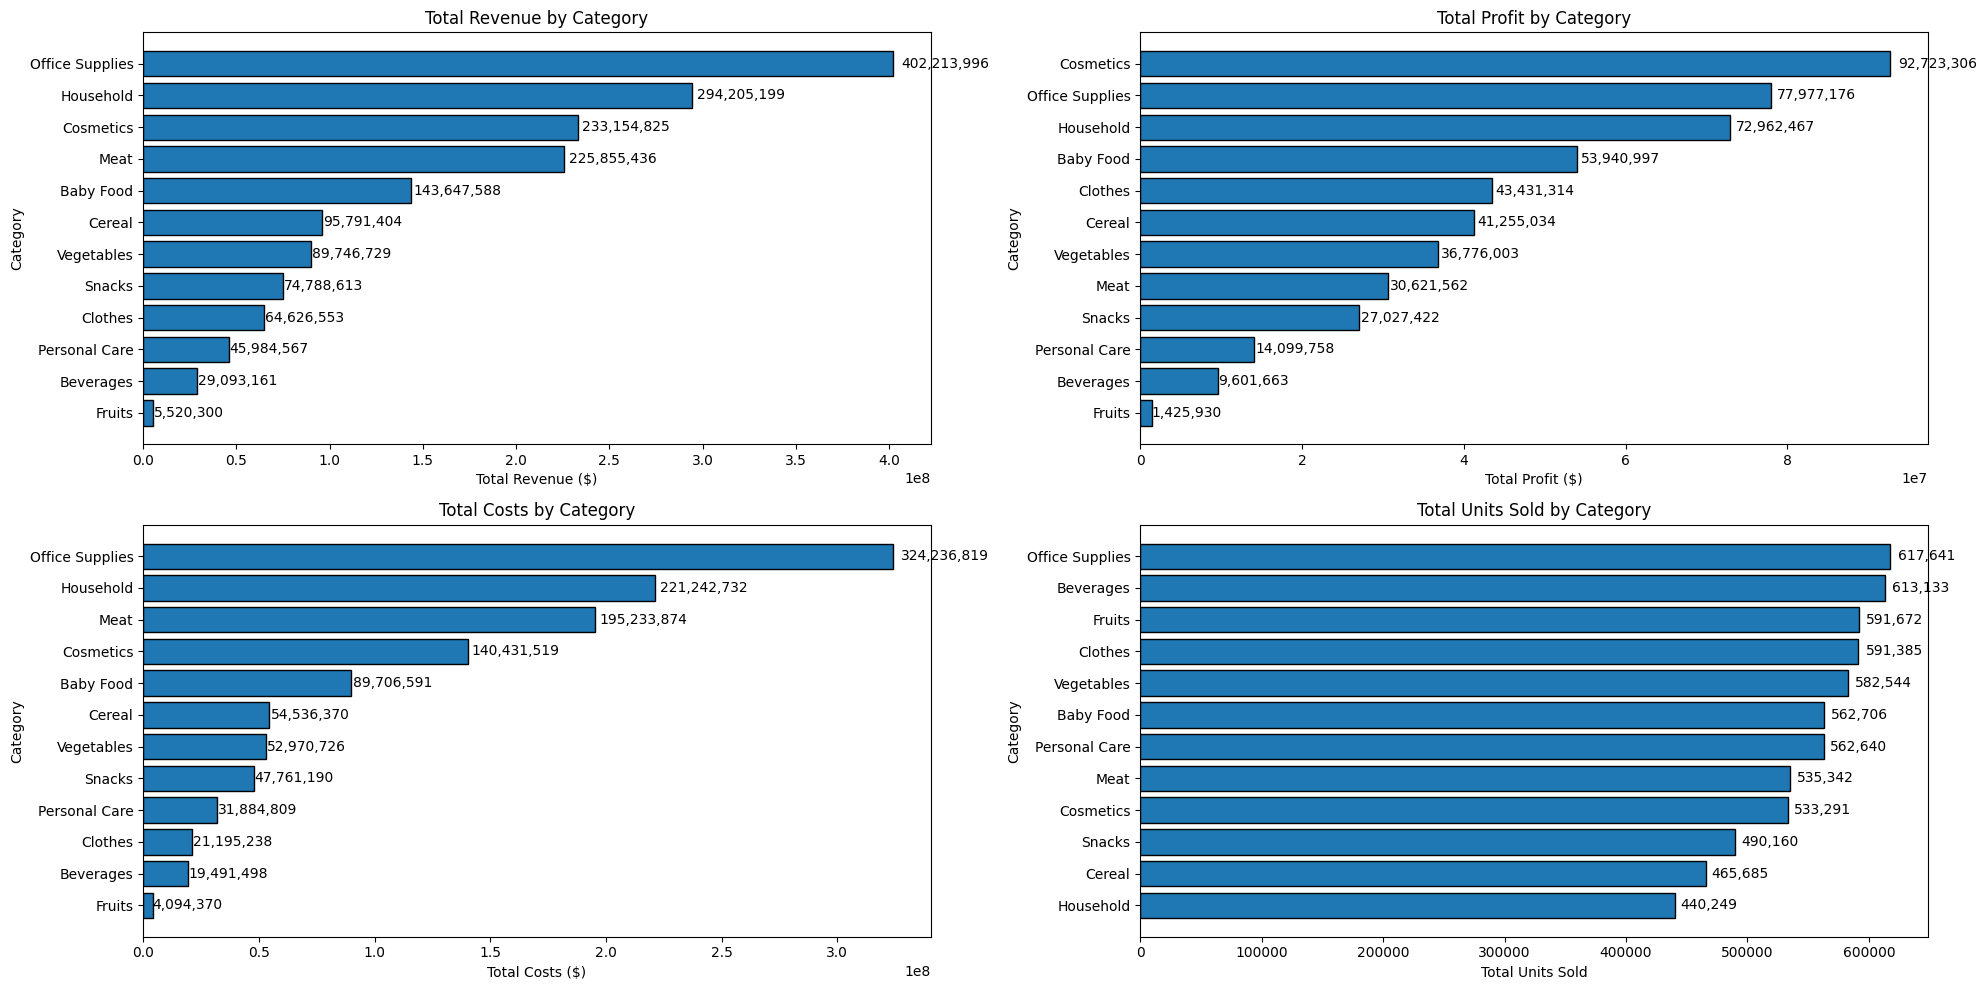

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(20, 10))

# Prepare columns for all graphs
df_events_products_countries["total_cost"] = (
    df_events_products_countries["unit_cost"] * df_events_products_countries["units_sold"]
)

df_events_products_countries["total_profit"] = (
    df_events_products_countries["total_revenue"] - df_events_products_countries["total_cost"]
)


#Total Revenue by Category
grouped_by_category = (
    df_events_products_countries.groupby("category")["total_revenue"]
    .sum().sort_values(ascending=True)
)

ax[0, 0].barh(grouped_by_category.index, grouped_by_category.values, edgecolor="black")
ax[0, 0].set_title("Total Revenue by Category")
ax[0, 0].set_xlabel("Total Revenue ($)")
ax[0, 0].set_ylabel("Category")

for i, value in enumerate(grouped_by_category.values):
    ax[0, 0].text(value * 1.01, i, f"{value:,.0f}", va="center")


#Total Profit by Category
grouped_profit_by_category = (
    df_events_products_countries.groupby("category")["total_profit"]
    .sum().sort_values(ascending=True)
)

ax[0, 1].barh(grouped_profit_by_category.index, grouped_profit_by_category.values, edgecolor="black")
ax[0, 1].set_title("Total Profit by Category")
ax[0, 1].set_xlabel("Total Profit ($)")
ax[0, 1].set_ylabel("Category")

for i, value in enumerate(grouped_profit_by_category.values):
    ax[0, 1].text(value * 1.01, i, f"{value:,.0f}", va="center")


# Total Costs by Category
grouped_cost_by_category = (
    df_events_products_countries.groupby("category")["total_cost"]
    .sum().sort_values(ascending=True)
)

ax[1, 0].barh(grouped_cost_by_category.index, grouped_cost_by_category.values, edgecolor="black")
ax[1, 0].set_title("Total Costs by Category")
ax[1, 0].set_xlabel("Total Costs ($)")
ax[1, 0].set_ylabel("Category")

for i, value in enumerate(grouped_cost_by_category.values):
    ax[1, 0].text(value * 1.01, i, f"{value:,.0f}", va="center")


# Total Units Sold by Category
grouped_sold_by_category = (
    df_events_products_countries.groupby("category")["units_sold"]
    .sum().sort_values(ascending=True)
)

ax[1, 1].barh(grouped_sold_by_category.index, grouped_sold_by_category.values, edgecolor="black")
ax[1, 1].set_title("Total Units Sold by Category")
ax[1, 1].set_xlabel("Total Units Sold")
ax[1, 1].set_ylabel("Category")

for i, value in enumerate(grouped_sold_by_category.values):
    ax[1, 1].text(value * 1.01, i, f"{value:,.0f}", va="center")


plt.tight_layout()
plt.show()




### **Sales Analysis by Product Categories**

**Most popular categories by units sold:**
Office Supplies, Beverages, Fruits, Clothes, Vegetables, Baby Food.

**Top revenue-generating categories:**
Office Supplies, Household, Cosmetics, Meat, Baby Food.

**Most profitable categories:**
Cosmetics, Office Supplies, Household, Baby Food, Clothes.

**Categories with the highest costs:**
Office Supplies, Household, Meat, Cosmetics, Baby Food.

**Recommendations:**

* **Focus on profitability:** Increase profit margins in popular but less profitable categories (e.g., Beverages).
* **Develop top performers:** Invest in marketing and promotion for the most profitable categories (Cosmetics, Office Supplies, Household).



## **Sales Analysis (revenue, costs, profits, product popularity) by geography (countries, regions).**

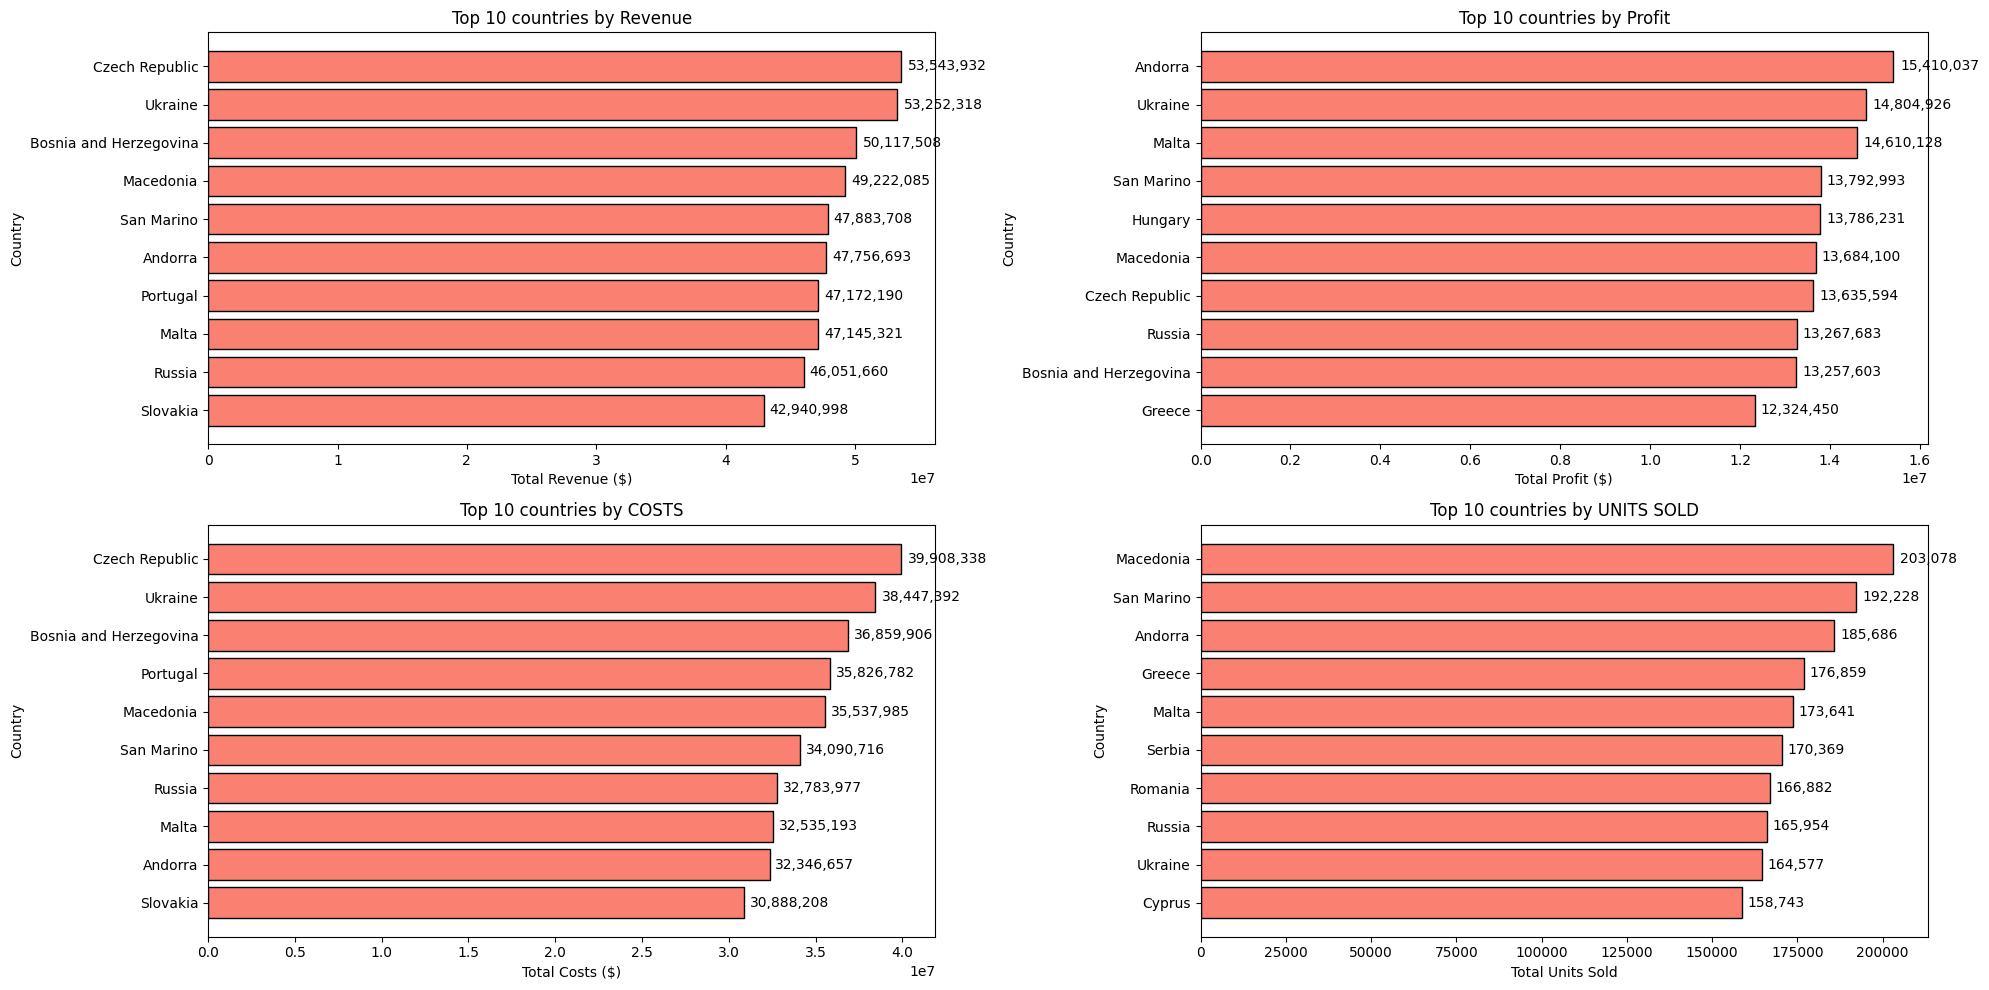

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(20, 10))

#Country "Unknown" excluded to avoid distortion
df_geo = df_events_products_countries[
    df_events_products_countries["country"] != "Unknown"

]
# Top 10 countries by REVENUE

grouped_revenue_by_country = (
    df_geo.groupby("country")["total_revenue"]
    .sum().sort_values(ascending=True).tail(10)
)

ax[0, 0].barh(grouped_revenue_by_country.index, grouped_revenue_by_country.values, color="salmon", edgecolor="black")
ax[0, 0].set_title("Top 10 countries by Revenue")
ax[0, 0].set_xlabel("Total Revenue ($)")
ax[0, 0].set_ylabel("Country")

for i, value in enumerate(grouped_revenue_by_country.values):
    ax[0, 0].text(value * 1.01, i, f"{value:,.0f}", va="center")

#  Top 10 countries by Profit
grouped_profit_by_country = (
    df_geo.groupby("country")["total_profit"]
    .sum().sort_values(ascending=True).tail(10)
)

ax[0, 1].barh(grouped_profit_by_country.index, grouped_profit_by_country.values, color="salmon", edgecolor="black")
ax[0, 1].set_title("Top 10 countries by Profit")
ax[0, 1].set_xlabel("Total Profit ($)")
ax[0, 1].set_ylabel("Country")

for i, value in enumerate(grouped_profit_by_country.values):
    ax[0, 1].text(value * 1.01, i, f"{value:,.0f}", va="center")


# Top 10 countries by COSTS
grouped_cost_by_country = (
    df_geo.groupby("country")["total_cost"]
    .sum().sort_values(ascending=True).tail(10)
)

ax[1, 0].barh(grouped_cost_by_country.index, grouped_cost_by_country.values, color="salmon", edgecolor="black")
ax[1, 0].set_title("Top 10 countries by COSTS")
ax[1, 0].set_xlabel("Total Costs ($)")
ax[1, 0].set_ylabel("Country")

for i, value in enumerate(grouped_cost_by_country.values):
    ax[1, 0].text(value * 1.01, i, f"{value:,.0f}", va="center")

# Top 10 countries by UNITS SOLD
grouped_sold_by_country = (
    df_geo.groupby("country")["units_sold"]
    .sum().sort_values(ascending=True).tail(10)
)

ax[1, 1].barh(grouped_sold_by_country.index, grouped_sold_by_country.values, color="salmon", edgecolor="black")
ax[1, 1].set_title("Top 10 countries by UNITS SOLD")
ax[1, 1].set_xlabel("Total Units Sold")
ax[1, 1].set_ylabel("Country")

for i, value in enumerate(grouped_sold_by_country.values):
    ax[1, 1].text(value * 1.01, i, f"{value:,.0f}", va="center")



plt.tight_layout()
plt.show()

In [ ]:
from ipywidgets import interact, widgets
countries = sorted(df_geo['country'].dropna().astype(str).unique())

# Function for plotting a graph for a selected country
def plot_profit_by_country(country):
    data = df_geo[df_geo['country'] == country]
    grouped = data.groupby('order_date')['total_profit'].sum().reset_index()

    plt.figure(figsize=(12, 6))
    plt.plot(grouped['order_date'], grouped['total_profit'], marker='o', color='skyblue')
    plt.title(f'Profit by Country by Order Date: {country}', fontsize=16)
    plt.xlabel('Month')
    plt.ylabel('Profit')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Dropdown
interact(plot_profit_by_country,
    country=widgets.Dropdown(options=countries, description='Country:'));

interactive(children=(Dropdown(description='Country:', options=('Albania', 'Andorra', 'Armenia', 'Austria', 'B…

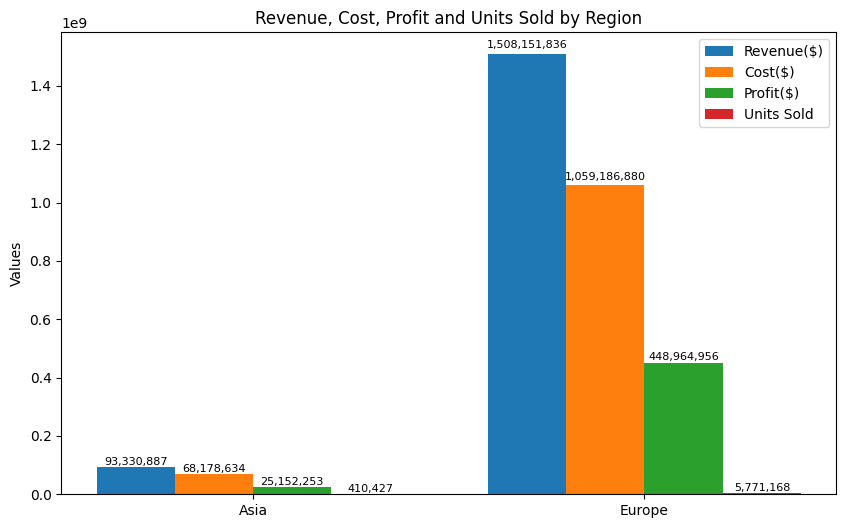

In [ ]:
# Region "Unknown" excluded to avoid distortion
df_region = df_events_products_countries[df_events_products_countries["region"] != "Unknown"]

region_metrics = df_region.groupby("region").agg({
    "total_revenue": "sum",
    "total_cost": "sum",
    "total_profit": "sum",
    "units_sold": "sum"
})

# Create positions for groups
regions = region_metrics.index.tolist()
x = np.arange(len(regions))  # positions of regions on x-axis
width = 0.2  # weigh of bars

fig, ax = plt.subplots(figsize=(10,6))

# Grouped bars
ax.bar(x - 1.5*width, region_metrics["total_revenue"], width, label="Revenue($)")
ax.bar(x - 0.5*width, region_metrics["total_cost"], width, label="Cost($)")
ax.bar(x + 0.5*width, region_metrics["total_profit"], width, label="Profit($)")
ax.bar(x + 1.5*width, region_metrics["units_sold"], width, label="Units Sold")

# Labels
ax.set_xticks(x)
ax.set_xticklabels(regions)
ax.set_ylabel("Values")
ax.set_title("Revenue, Cost, Profit and Units Sold by Region")
ax.legend()

# Value labels for the bars
for i in range(len(regions)):
    for j, metric in enumerate(["total_revenue", "total_cost", "total_profit", "units_sold"]):
        value = region_metrics.iloc[i][metric]
        ax.text(
            x[i] + (j-1.5)*width, value*1.01, f"{value:,.0f}", ha='center', va='bottom', fontsize=8
        )

plt.show()


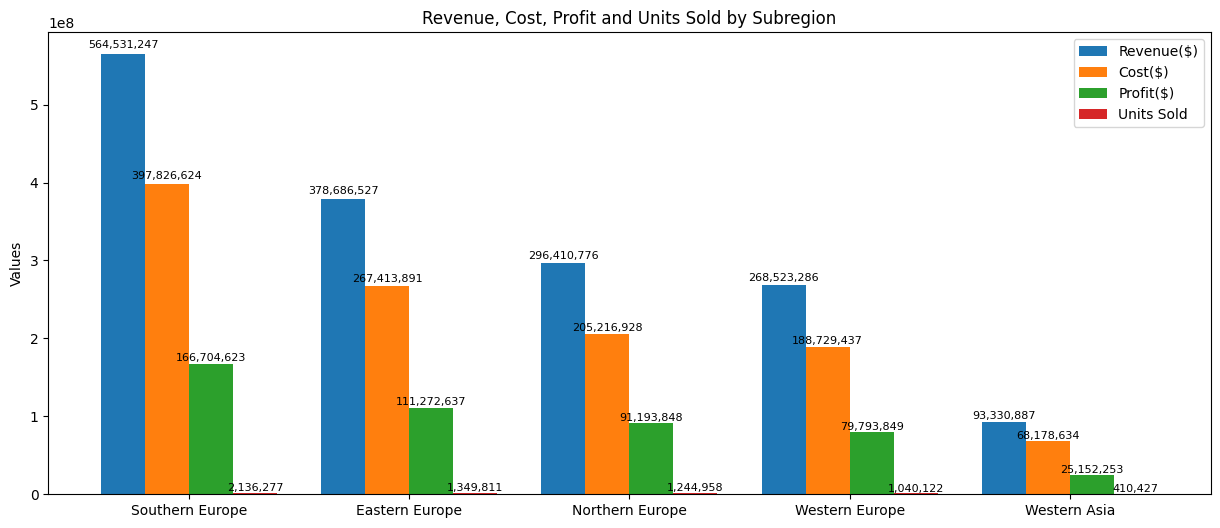

In [ ]:
# Subregion "Unknown" excluded to avoid distortion
df_subregion = df_events_products_countries[df_events_products_countries["sub_region"] != "Unknown"]

subregion_metrics = df_subregion.groupby("sub_region").agg({
    "total_revenue": "sum",
    "total_cost": "sum",
    "total_profit": "sum",
    "units_sold": "sum"
}).sort_values(by="total_revenue", ascending=False).tail(5)

# Create positions for groups
sub_regions = subregion_metrics.index.tolist()
x = np.arange(len(sub_regions))  # positions of subregions on x-axis
width = 0.2  # weigh of bars

fig, ax = plt.subplots(figsize=(15,6))

# Grouped bars
ax.bar(x - 1.5*width, subregion_metrics["total_revenue"], width, label="Revenue($)")
ax.bar(x - 0.5*width, subregion_metrics["total_cost"], width, label="Cost($)")
ax.bar(x + 0.5*width, subregion_metrics["total_profit"], width, label="Profit($)")
ax.bar(x + 1.5*width, subregion_metrics["units_sold"], width, label="Units Sold")

# Labels
ax.set_xticks(x)
ax.set_xticklabels(sub_regions)
ax.set_ylabel("Values")
ax.set_title("Revenue, Cost, Profit and Units Sold by Subregion")
ax.legend()

# Value labels for the bars
for i in range(len(sub_regions)):
    for j, metric in enumerate(["total_revenue", "total_cost", "total_profit", "units_sold"]):
        value = subregion_metrics.iloc[i][metric]
        ax.text(
            x[i] + (j-1.5)*width, value*1.01, f"{value:,.0f}", ha='center', va='bottom', fontsize=8
        )

plt.show()



### **Company Activity by Geography**

The most profitable countries are: **Czech Republic, Ukraine, Bosnia and Herzegovina, Portugal, and Macedonia**.

The countries with the highest costs are the same ones that generate the highest revenue: **Czech Republic, Ukraine, Bosnia and Herzegovina, Portugal, and Macedonia**.

The leaders by number of sales are: **Macedonia, San Marino, Andorra, Greece, and Malta**.

The most profitable countries are: **Andorra, Ukraine, Malta, San Marino, and Hungary**.

The leading region is **Europe** (448.5M USD), particularly ***Southern Europe*** subregion (166.2M USD).


**Recommendations:**
Adopt a market expansion strategy and strengthen marketing presence and logistics in **Southern Europe**, leveraging the strong performance in the leading countries as a foundation for further growth.


## **Sales analysis (revenue, costs, profits, product popularity) by sales channel (online or offline).**

In [ ]:
#Normalization of data

df_events_products_countries["sales_channel"].value_counts()


,count
sales_channel,
Offline,667
Online,660
online,3


In [ ]:
df_events_products_countries["sales_channel"] = (
    df_events_products_countries["sales_channel"]
    .str.strip()
    .str.capitalize()
)

df_events_products_countries["sales_channel"].value_counts()


,count
sales_channel,
Offline,667
Online,663


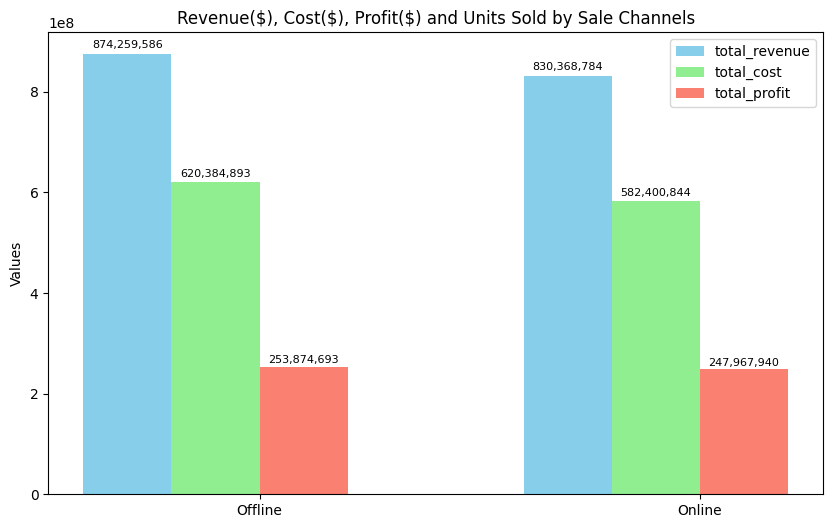

In [ ]:
# 1. Pivot table for sales channels
channel_pivot = df_events_products_countries.pivot_table(
    index="sales_channel",
    values=["total_revenue", "total_cost", "total_profit"],
    aggfunc="sum"
)

# 2. Positions for groups
channels = channel_pivot.index.tolist()
x = np.arange(len(channels))
width = 0.2

fig, ax = plt.subplots(figsize=(10,6))

# 3. grouped bars
metrics = ["total_revenue", "total_cost", "total_profit"]
colors = ["skyblue", "lightgreen", "salmon"]

for i, metric in enumerate(metrics):
    ax.bar(x + (i-1.5)*width, channel_pivot[metric], width, label=metric, color=colors[i])

# 4. Labels
ax.set_xticks(x)
ax.set_xticklabels(channels)
ax.set_ylabel("Values")
ax.set_title("Revenue($), Cost($), Profit($) and Units Sold by Sale Channels")
ax.legend()

# 5. Bar labels
for i in range(len(channels)):
    for j, metric in enumerate(metrics):
        value = channel_pivot[metric].iloc[i]
        ax.text(
            x[i] + (j-1.5)*width, value*1.01, f"{value:,.0f}", ha='center', va='bottom', fontsize=8
        )

plt.show()

### **Sales Analysis (Online and Offline)**
**Even Diversification**: The number of online and offline orders is almost the same.

**Profitability:** Offline sales bring more profit.

## **Analysis of the time interval between order and shipment by product category, countries, and regions.**

In [ ]:
df_events_products_countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        1330 non-null   int64         
 1   order_date      1330 non-null   datetime64[ns]
 2   ship_date       1330 non-null   datetime64[ns]
 3   order_priority  1330 non-null   object        
 4   country_code    1330 non-null   object        
 5   product_id      1330 non-null   int64         
 6   sales_channel   1330 non-null   object        
 7   units_sold      1330 non-null   float64       
 8   unit_price      1330 non-null   float64       
 9   unit_cost       1330 non-null   float64       
 10  category        1330 non-null   object        
 11  country         1330 non-null   object        
 12  country_code_2  1330 non-null   object        
 13  region          1330 non-null   object        
 14  sub_region      1330 non-null   object        
 15  tota

In [ ]:
df_events_products_countries.head()

,order_id,order_date,ship_date,order_priority,country_code,product_id,sales_channel,units_sold,unit_price,unit_cost,category,country,country_code_2,region,sub_region,total_revenue,total_cost,total_profit
0,100640618,2014-10-08,2014-10-18,M,NOR,2103,Online,650.0,205.70,117.11,Cereal,Norway,NO,Europe,Northern Europe,133705.00,76121.50,57583.50
1,100983083,2016-08-11,2016-08-11,C,SRB,2103,Offline,1993.0,205.70,117.11,Cereal,Serbia,RS,Europe,Southern Europe,409960.10,233400.23,176559.87
2,101025998,2014-07-18,2014-08-11,M,Unknown,7940,Online,4693.0,668.27,502.54,Household,Unknown,Unknown,Unknown,Unknown,3136191.11,2358420.22,777770.89
3,102230632,2017-05-13,2017-06-13,L,MNE,2455,Online,1171.0,109.28,35.84,Clothes,Montenegro,ME,Europe,Southern Europe,127966.88,41968.64,85998.24
4,103435266,2012-08-11,2012-09-18,H,SRB,1270,Offline,7648.0,47.45,31.79,Beverages,Serbia,RS,Europe,Southern Europe,362897.60,243129.92,119767.68


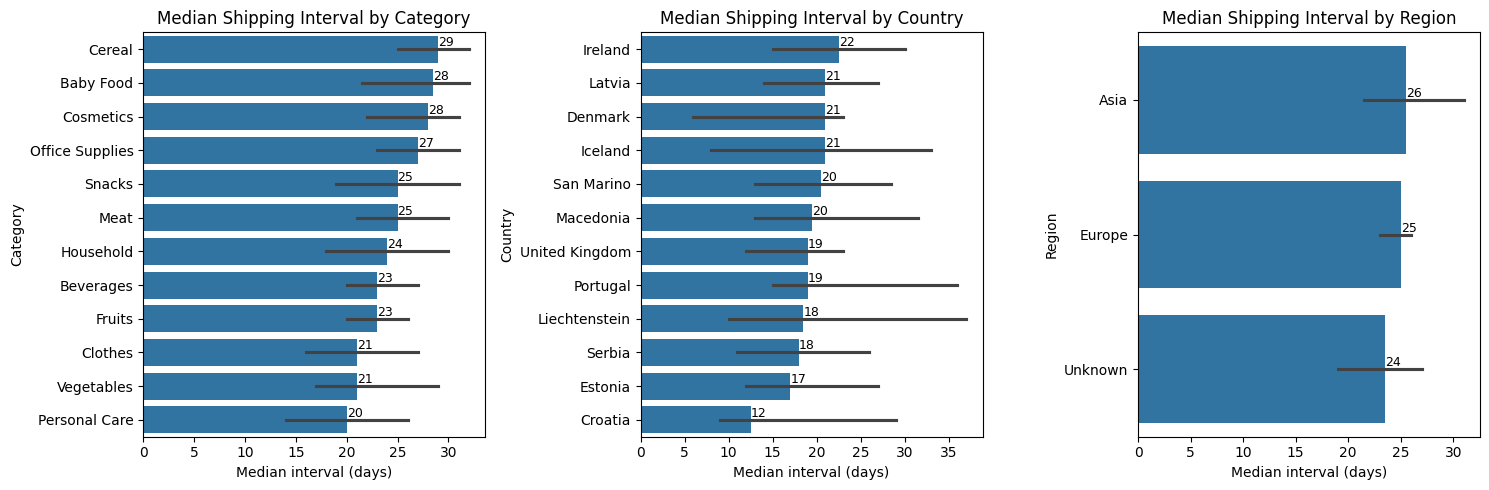

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

#Convert datatype
df_events_products_countries["order_date"] = pd.to_datetime(df_events_products_countries["order_date"])
df_events_products_countries["ship_date"] = pd.to_datetime(df_events_products_countries["ship_date"])

#Count difference between ship_date і order_date in days
df_events_products_countries["interval"] = (
    df_events_products_countries["ship_date"] - df_events_products_countries["order_date"]
).dt.days

# Sort categories by Median Shipping Interval
grouped_interval_by_category = (
    df_events_products_countries.groupby("category")["interval"]
    .median()
    .sort_values(ascending=False)
)
category_order = grouped_interval_by_category.index

# Median Shipping Interval by Category
sns.barplot(
    y="category",
    x="interval",
    order=category_order,
    data=df_events_products_countries,
    estimator=np.median,
    orient="h",
    ax=ax[0]
)

# Add labels
for p in ax[0].patches:
    width = p.get_width()
    if width > 0:
        ax[0].text(
            width,
            p.get_y() + p.get_height() / 2,
            f"{width:.0f}",
            ha='left',
            va='bottom',
            fontsize=9,
            color="black"
        )

ax[0].set_title("Median Shipping Interval by Category")
ax[0].set_xlabel("Median interval (days)")
ax[0].set_ylabel("Category")

#----------------------------------------------------------------------
# Sort countries by Median Shipping Interval
grouped_interval_by_country = (
    df_events_products_countries.groupby("country")["interval"]
    .median()
    .sort_values(ascending=False).tail(12)
)
country_order = grouped_interval_by_country.index

# Barchar in the subplot
sns.barplot(
    y="country",
    x="interval",
    order=country_order,
    data=df_events_products_countries,
    estimator=np.median,
    orient="h",
    ax=ax[1]
)

# Add labels
for p in ax[1].patches:
    width = p.get_width()
    if width > 0:
        ax[1].text(
            width,
            p.get_y() + p.get_height() / 2,
            f"{width:.0f}",
            ha='left',
            va='bottom',
            fontsize=9,
            color="black"
        )

ax[1].set_title("Median Shipping Interval by Country")
ax[1].set_xlabel("Median interval (days)")
ax[1].set_ylabel("Country")

#----------------------------------------------------------------------
# Sort regions by Median Shipping Interval
grouped_interval_by_region = (
    df_events_products_countries.groupby("region")["interval"]
    .median()
    .sort_values(ascending=False)
)
region_order = grouped_interval_by_region.index

# Barchar in the third subplot
sns.barplot(
    y="region",
    x="interval",
    order=region_order,
    data=df_events_products_countries,
    estimator=np.median,
    orient="h",
    ax=ax[2]
)

# Add labels
for p in ax[2].patches:
    width = p.get_width()
    if width > 0:
        ax[2].text(
            width,
            p.get_y() + p.get_height() / 2,
            f"{width:.0f}",
            ha='left',
            va='bottom',
            fontsize=9,
            color="black"
        )

ax[2].set_title("Median Shipping Interval by Region")
ax[2].set_xlabel("Median interval (days)")
ax[2].set_ylabel("Region")

plt.tight_layout()
plt.show()



### **Analysis of the Time Interval Between Order Placement and Shipment**

The product categories exhibiting the longest intervals, defined as the number of days between the order date and the shipment date (**Shipping Interval**), are **Cereal, Baby Food, Cosmetics, Office Supplies, and Snacks**. *These categories may require more complex processing, packaging, or logistical coordination, contributing to extended fulfillment times.*

The countries with the highest Shipping Interval are: **Ireland, Latvia, Denmark, Iceland, and San Marino**.

Across regions, the Shipping Interval is relatively consistent, ranging **from 24 to 26 days.**

## **Analysis of the dependence of profit on the time required to ship goods.**

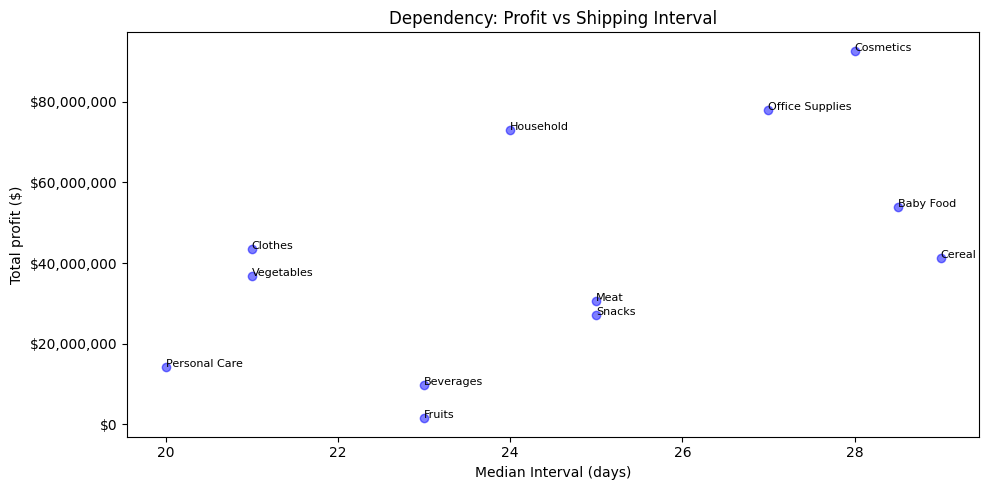

In [ ]:
#PROFIT
grouped_profit_by_category = (
    df_events_products_countries.groupby("category")["total_profit"]
    .sum()
)

# INTERVAL
grouped_interval_by_category = (
    df_events_products_countries.groupby("category")["interval"]
    .median()
)

df_scatter = pd.DataFrame({
    "profit": grouped_profit_by_category,
    "interval": grouped_interval_by_category
})


# --- Scatter chart ---
plt.figure(figsize=(10,5))
plt.scatter(df_scatter["interval"], df_scatter["profit"], color="blue", alpha=0.5)

plt.xlabel("Median Interval (days)")
plt.ylabel("Total profit ($)")
plt.title("Dependency: Profit vs Shipping Interval")

# --- Money formatting on Y axis ---
def money(x, pos):
    return f'${x:,.0f}'

plt.gca().yaxis.set_major_formatter(FuncFormatter(money))


# Labels for the categories
for category, row in df_scatter.iterrows():
    plt.text(row["interval"], row["profit"], category, fontsize=8)

plt.tight_layout()
plt.show()


### **Analysis of the Relationship Between the Order–Shipment Interval and Profit**

The analysis indicates **no direct correlation** between the time interval from order placement to shipment and the resulting profit. Profitability does not appear to be influenced by how long it takes to process and ship an order.

Instead, the primary drivers of profit are factors such as **customer demand, product quality, and brand recognition**. These elements play a significantly larger role in determining sales volume and profitability.

**Recommendations:**
Focus on strengthening brand presence by investing in advertising and marketing activities. Enhancing brand visibility and perceived value may increase customer willingness to wait for products, even when shipping intervals are longer.



## **Analysis of sales dynamics (over time) by product categories, countries, regions, identification of main trends.**

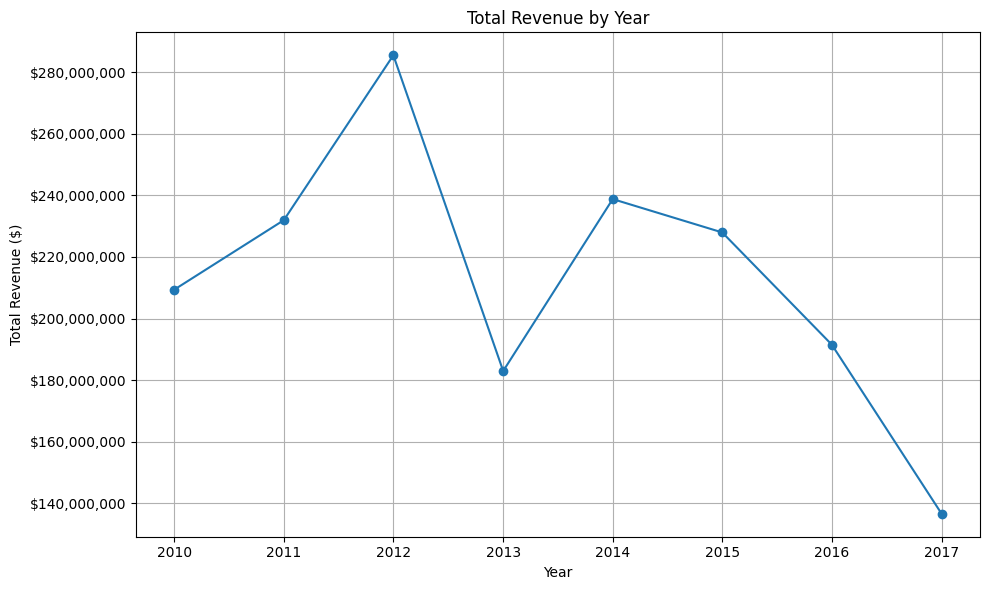

In [ ]:
revenue_by_year = (df_events_products_countries.groupby(df_events_products_countries["order_date"].dt.to_period("Y"))["total_revenue"].sum())
revenue_by_year.index = revenue_by_year.index.to_timestamp()

plt.figure(figsize=(10, 6))
plt.plot(revenue_by_year.index, revenue_by_year.values, marker='o', linestyle='-')
plt.title("Total Revenue by Year")
plt.xlabel('Year')
plt.ylabel('Total Revenue ($)')

# --- Money formatting on Y axis ---
def money(x, pos):
    return f'${x:,.0f}'

plt.gca().yaxis.set_major_formatter(FuncFormatter(money))
plt.grid(True)

plt.tight_layout()
plt.show()


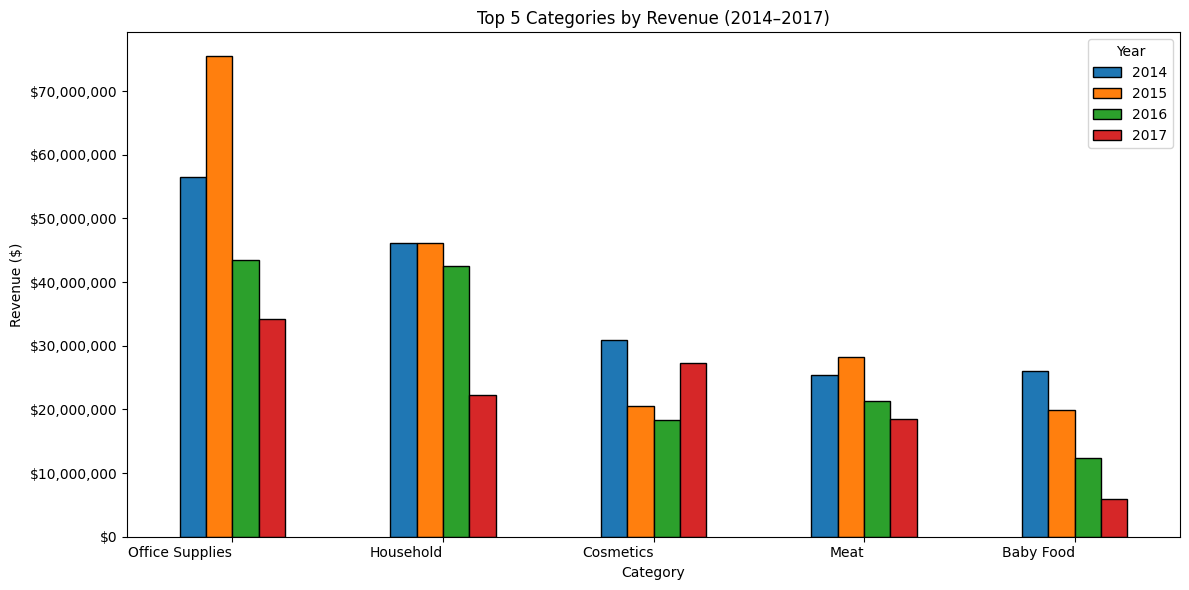

In [ ]:
# Add column to dataframe "year"
df_events_products_countries["year"] = df_events_products_countries["order_date"].dt.year

# Filter years from 2014 to 2017
df_years = df_events_products_countries[df_events_products_countries["year"].between(2014, 2017)]

# Group revenue by categories and years
revenue_by_category_year = (
    df_years.groupby(["category", "year"])["total_revenue"]
    .sum()
    .reset_index()
)

# Find top-5 categories by total revenue from 2014 to 2017
top5_categories = (
    revenue_by_category_year.groupby("category")["total_revenue"]
    .sum()
    .sort_values(ascending=False)
    .head(5)
    .index
)

# Pivot table
pivot_df_categories = revenue_by_category_year.pivot(index="category", columns="year", values="total_revenue")

# Filter top 5 categories
pivot_df_categories = pivot_df_categories.loc[top5_categories]

# Buiding the chart
pivot_df_categories.plot(
    kind="bar",
    figsize=(12,6),
    edgecolor="black"
)

plt.title("Top 5 Categories by Revenue (2014–2017)")
plt.xlabel("Category")
plt.ylabel("Revenue ($)")
plt.xticks(rotation=0, ha="right")
plt.legend(title="Year")

# --- Money formatting on Y axis ---
def money(x, pos):
    return f'${x:,.0f}'

plt.gca().yaxis.set_major_formatter(FuncFormatter(money))

plt.tight_layout()
plt.show()



In [ ]:
print(pivot_df_categories)

year                    2014         2015         2016         2017
category                                                           
Office Supplies  56529586.47  75447888.18  43534690.92  34211317.35
Household        46085904.01  46133351.18  42542068.20  22181217.84
Cosmetics        30832655.60  20544902.40  18402622.40  27240620.40
Meat             25361917.35  28157782.38  21259880.88  18445874.58
Baby Food        26004097.20  19961109.04  12321599.76   5871950.56


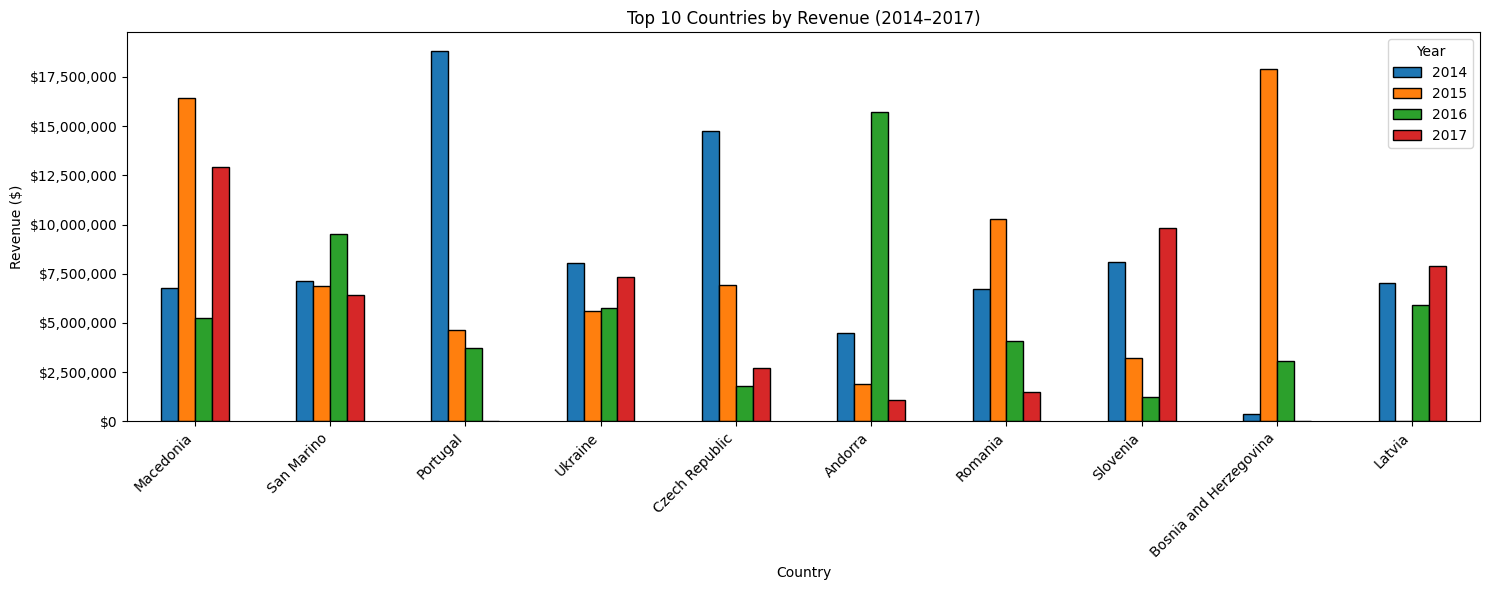

In [ ]:
# Add column "year" to dataframe without "Unknown" country
df_geo = df_geo.copy()
df_geo["year"] = df_geo["order_date"].dt.year

# Filter years from 2014 to 2017
df_years_countries = df_geo[df_geo["year"].between(2014, 2017)]

# Group revenue by countries and years
revenue_country_year = (
    df_years_countries.groupby(["country", "year"])["total_revenue"]
    .sum()
    .reset_index()
)

# Find the top 10 countries by total revenue from 2014 to 2017
top10_countries = (
    revenue_country_year.groupby("country")["total_revenue"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .index
)

# Pivot table
pivot_df_countries = revenue_country_year.pivot(index="country", columns="year", values="total_revenue")

# Filter the top 10 countries
pivot_df_countries = pivot_df_countries.loc[top10_countries]

# Bar chart
pivot_df_countries.plot(
    kind="bar",
    figsize=(15,6),
    edgecolor="black"
)

plt.title("Top 10 Countries by Revenue (2014–2017)")
plt.xlabel("Country")
plt.ylabel("Revenue ($)")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Year")

# --- Money formatting on Y axis ---
def money(x, pos):
    return f'${x:,.0f}'

plt.gca().yaxis.set_major_formatter(FuncFormatter(money))


plt.tight_layout()
plt.show()

In [ ]:
print(pivot_df_countries)

year                           2014         2015         2016         2017
country                                                                   
Macedonia                6793562.66  16448519.15   5257799.87  12904145.62
San Marino               7143329.27   6887135.47   9500466.98   6422840.37
Portugal                18823812.24   4654916.19   3709836.11          NaN
Ukraine                  8028817.86   5631454.86   5764026.00   7347212.53
Czech Republic          14761657.41   6911639.34   1775727.68   2707491.46
Andorra                  4491127.58   1884229.67  15724851.18   1090022.00
Romania                  6718476.82  10282279.03   4071696.04   1512994.13
Slovenia                 8075484.82   3224083.38   1222330.33   9803137.88
Bosnia and Herzegovina    397495.31  17905347.83   3057379.29          NaN
Latvia                   7047967.83          NaN   5932424.46   7883355.03


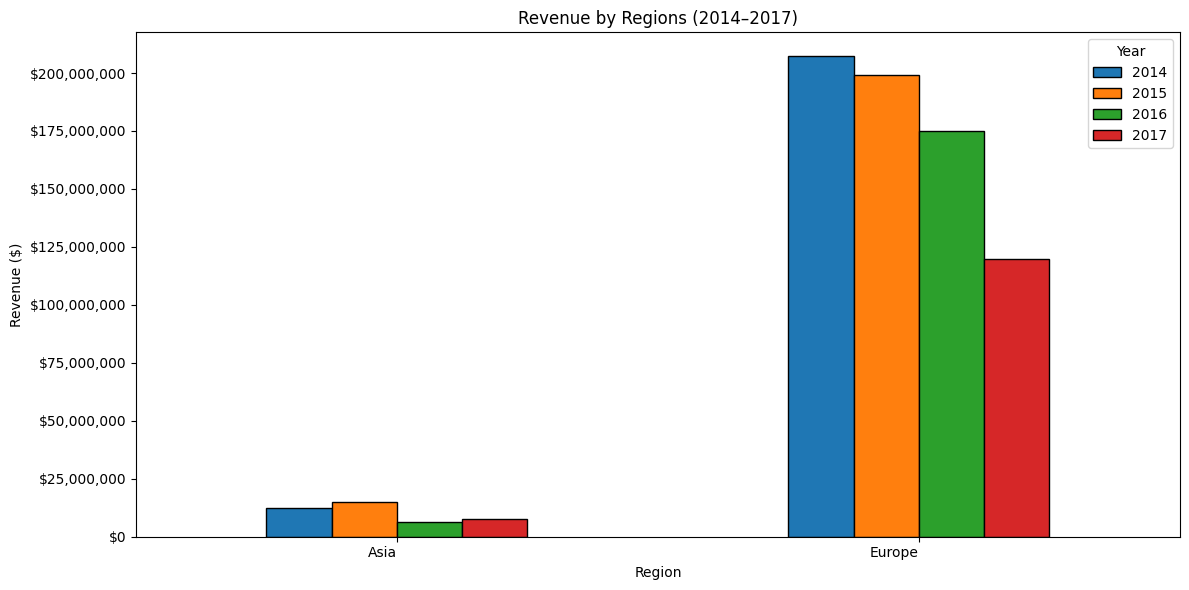

In [ ]:
#  Add column "year" for dataframe withot "Unknown" region
df_region = df_region.copy()
df_region["year"] = df_region["order_date"].dt.year

# Filter years 2014 - 2017
df_years_region = df_region[df_region["year"].between(2014, 2017)]


# Group revenue by regions and years
revenue_regions_year = (
    df_years_region.groupby(["region", "year"])["total_revenue"]
    .sum()
    .reset_index()
)

# Pivot table
pivot_df = revenue_regions_year.pivot(index="region", columns="year", values="total_revenue")


# Bar chart
pivot_df.plot(
    kind="bar",
    figsize=(12,6),
    edgecolor="black"
)

plt.title("Revenue by Regions (2014–2017)")
plt.xlabel("Region")
plt.ylabel("Revenue ($)")
plt.xticks(rotation=0, ha="right")
plt.legend(title="Year")

# --- Money formatting on Y axis ---
def money(x, pos):
    return f'${x:,.0f}'

plt.gca().yaxis.set_major_formatter(FuncFormatter(money))

plt.tight_layout()
plt.show()

In [ ]:
print(pivot_df)

year            2014          2015          2016          2017
region                                                        
Asia    1.227657e+07  1.476692e+07  6.243820e+06  7.533370e+06
Europe  2.071970e+08  1.992201e+08  1.750343e+08  1.198274e+08



**Analysis of Sales Dynamics (Over Time) by Product Categories, Countries, and Regions, and Identification of Key Trends**

Based on the analysis of the period from **2012 to 2017**, we observe an overall decline in sales. The peak occurred in **2012**, followed by a significant increase in **2014**, and then a sharp downturn continuing through **2017**.

To analyze sales dynamics by product categories, countries, and regions, a data subset for **2014–2017** was extracted.

Over the last four years, a general downward trend in sales is visible. The only exceptions are the **Cosmetics** and **Snacks** categories, which show growth.

There are no consistently leading countries — the top purchasers change from year to year. Although most countries demonstrate declining sales, there is an upward movement in **2017** for several countries, including *Macedonia, Slovenia,* and *Latvia*.

The analysis of revenue dynamics across regions also reveals a declining trend.





## **Analysis of sales by day of the week. Identification of seasonality of products.**

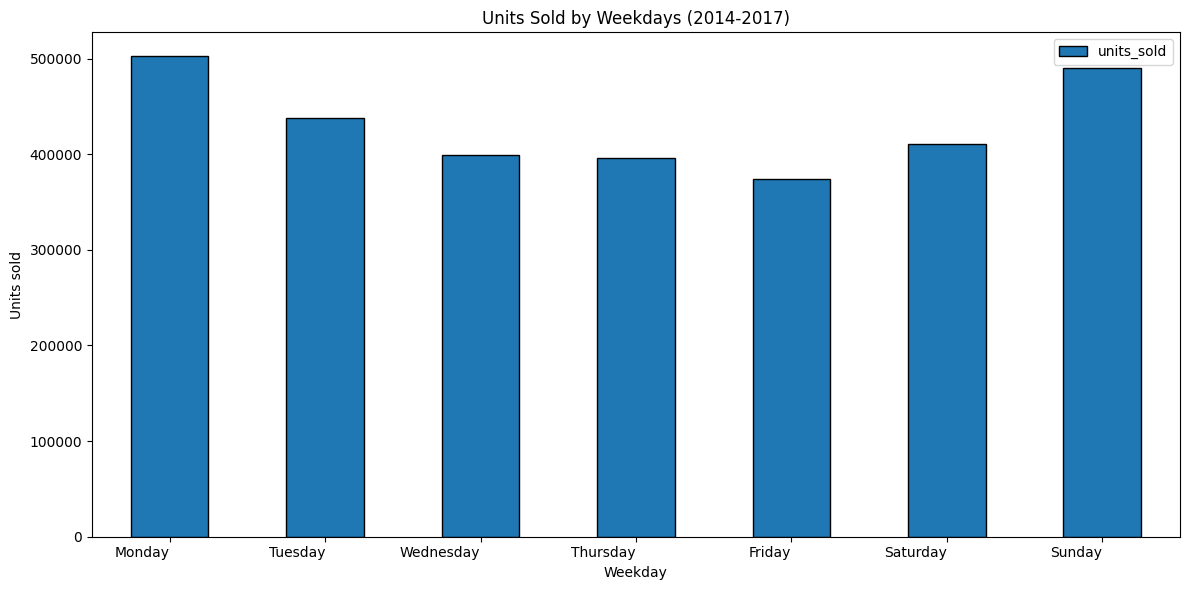

In [ ]:
weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

df_events_products_countries["day"] = pd.Categorical(
    df_events_products_countries["order_date"].dt.day_name(),
    categories=weekday_order,
    ordered=True
)

# Filter years from 2014 to 2017
df_years = df_events_products_countries[df_events_products_countries["year"].between(2014, 2017)]

# Pivot table
pivot_table_weekday = pd.pivot_table(df_years, values="units_sold", index="day", aggfunc="sum", observed=False)

# Buiding the bar chart
pivot_table_weekday.plot(
    kind="bar",
    figsize=(12,6),
    edgecolor="black"
)

plt.title("Units Sold by Weekdays (2014-2017)")
plt.xlabel("Weekday")
plt.ylabel("Units sold")
plt.xticks(rotation=0, ha="right")

plt.tight_layout()
plt.show()


In [ ]:
print(pivot_table_weekday)

           units_sold
day                  
Monday       502350.0
Tuesday      438248.0
Wednesday    399432.0
Thursday     395890.0
Friday       373798.0
Saturday     411110.0
Sunday       489961.0


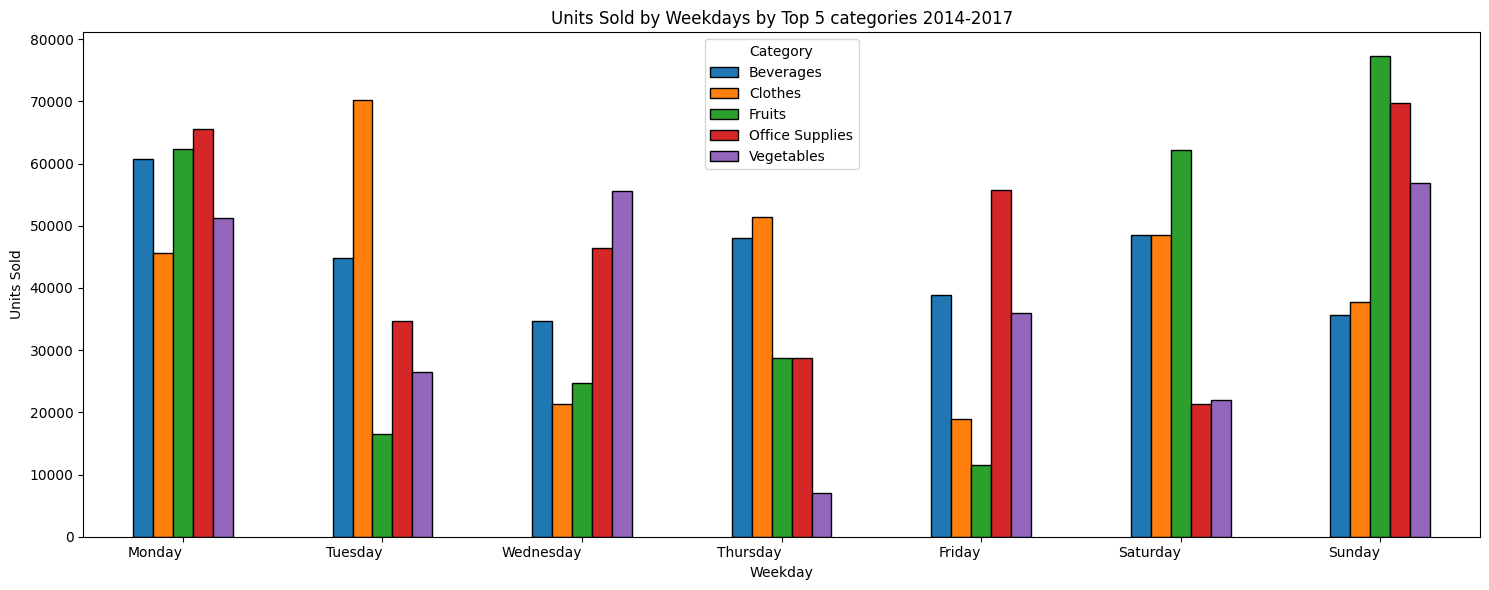

In [ ]:

# Find top-5 categories by order_id
top5_categories_season = (
    df_years.groupby("category")["units_sold"]
    .sum()
    .sort_values(ascending=False)
    .head(5)
    .index
)

# Filter dataframe for only top-5 categories
df_top5_categories_season = df_years[df_years["category"].isin(top5_categories_season)]


# Group order_id by day and category
pivot_table = pd.pivot_table(
    df_top5_categories_season,
    values="units_sold",
    index="day",
    columns="category",
    aggfunc="sum",
    observed=False
)

# Build the bar chart
pivot_table.plot(
    kind="bar",
    figsize=(15, 6),
    edgecolor="black"
)

plt.title("Units Sold by Weekdays by Top 5 categories 2014-2017")
plt.xlabel("Weekday")
plt.ylabel("Units Sold")
plt.xticks(rotation=0, ha="right")
plt.legend(title="Category")


plt.tight_layout()
plt.show()

In [ ]:
print(pivot_table)

category   Beverages  Clothes   Fruits  Office Supplies  Vegetables
day                                                                
Monday       60784.0  45622.0  62318.0          65523.0     51262.0
Tuesday      44739.0  70166.0  16564.0          34744.0     26466.0
Wednesday    34693.0  21392.0  24692.0          46370.0     55502.0
Thursday     48087.0  51337.0  28719.0          28714.0      7108.0
Friday       38885.0  18874.0  11536.0          55682.0     36003.0
Saturday     48500.0  48442.0  62171.0          21286.0     21996.0
Sunday       35601.0  37711.0  77229.0          69733.0     56889.0


### **Sales Analysis by Day of the Week**

**Overall Sales Overview**

**Highest Sales:**

* **Monday** (near 502,000 units) and **Sunday** (~495,000 units) are the peak days.
* This indicates that customers tend to shop actively at the start of the week and on weekends.

**Lowest Sales:**

* **Friday** (~372,000 units) — the lowest performance.
* This may indicate that people are busy preparing for the weekend.

**Mid-range Sales:**

* Tuesday, Wednesday, Thursday, and Saturday show moderate sales in the range of 395,000–435,000 units.

---

 **Top 5 Categories by Day of the Week**

 **Beverages**

* Stable demand throughout the week (35,000-60,000 units).
* Peak on Monday (~60,000).
* Lowest on Wednesday (~35,000).

 **Clothes**

* Clear intra-week seasonality.
* **Tuesday** - unusually high demand (~70,000 units).
* **Thursday** (near 52,000) and **Saturday** (~49,000) also show strong sales.
* Lowest sales midweek and on Friday.

 **Fruits**

* **Sunday** is the absolute leader (~77,000 units).
* Monday and Saturday also show high demand (62,000-63,000).
* Sharp drop on Tuesday (near 16,000) and Friday (~11,000).
* This indicates that people prefer buying fresh fruits for the weekend.

 **Office Supplies**

* **Sunday** (near 69,000) and **Monday** (~65,000) show the highest sales.
* Indicates preparation for the workweek.
* **Friday** also shows an increase (~56,000) - stocking up before the weekend.
* Wednesday (~46,000) is the lowest point.

 **Vegetables**

* **Sunday** (near 57,000) and **Wednesday** (~55,000) are peak days.
* The lowest sales are on Thursday (~7,000) — an anomalous decline.
* This may suggest that customers buy fresh vegetables twice a week.

---

## **Key Insights**

1. **Monday and Sunday** are critical days for retail performance.
2. **Friday** is the weakest day — promotional activities should be increased.
3. **Different categories peak on different days:**

   * Clothes sell best on Tuesday.
   * Fresh products (fruits, vegetables) peak on weekends.
   * Office supplies — Sunday and Monday.
4. **Recommendations:**

   * Optimize staffing and stock levels for Monday and Sunday.
   * Enhance marketing strategies on Friday to boost sales.



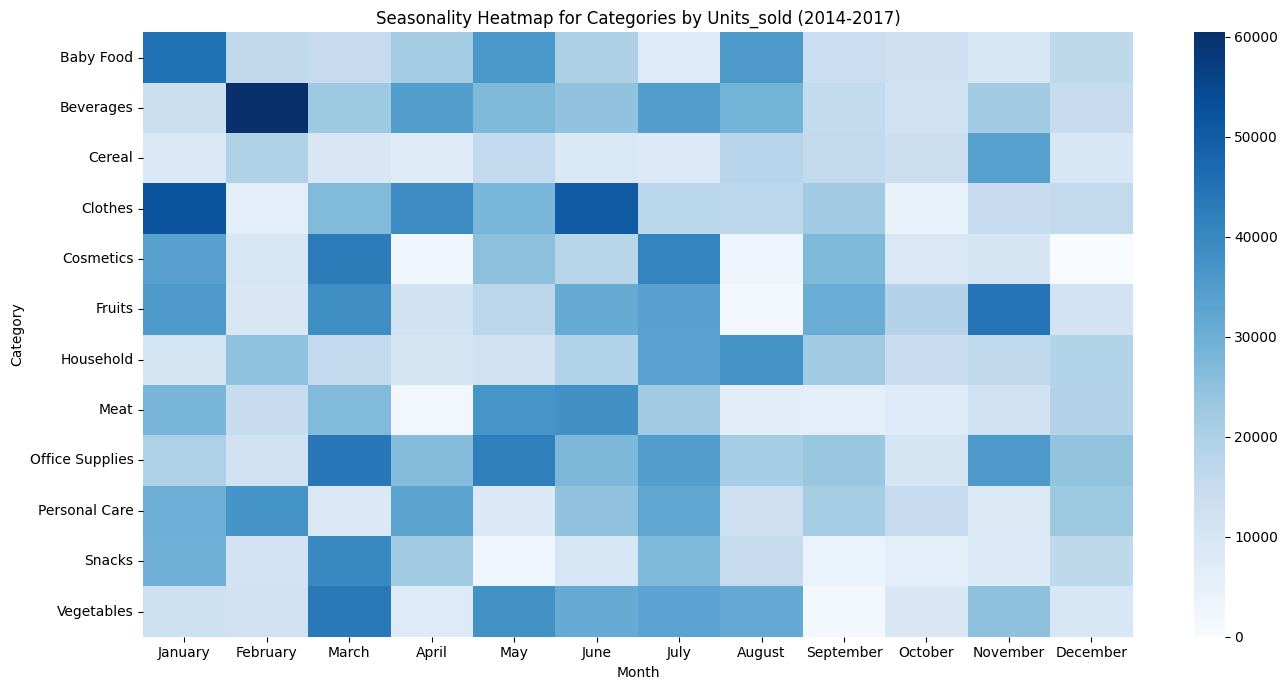

In [ ]:
month_order = ["January", "February", "March", "April", "May", "June",
               "July", "August", "September", "October", "November", "December"]

# Add column to dataframe 2014 - 2017 years "month"
df_years = df_years.copy()
df_years["month"] = pd.Categorical(
    df_years["order_date"].dt.month_name(),
    categories=month_order,
    ordered=True
)

# Pivot for heatmap: categories × months
pivot_heatmap = pd.pivot_table(
    df_years,
    values="units_sold",
    index="category",
    columns="month",
    aggfunc="sum",
    observed=False
)




plt.figure(figsize=(14,7))
sns.heatmap(pivot_heatmap, annot=False, cmap="Blues")

plt.title("Seasonality Heatmap for Categories by Units_sold (2014-2017)")
plt.xlabel("Month")
plt.ylabel("Category")



plt.tight_layout()
plt.show()


In [ ]:
print(pivot_heatmap)

month            January  February    March    April      May     June  \
category                                                                 
Baby Food        45150.0   16146.0  15185.0  21950.0  35902.0  19852.0   
Beverages        13276.0   60452.0  22728.0  34811.0  27344.0  24655.0   
Cereal            8818.0   19270.0   9313.0   7500.0  15757.0   9007.0   
Clothes          51735.0    5984.0  27148.0  38789.0  27949.0  50511.0   
Cosmetics        33593.0    9693.0  42786.0   2139.0  25398.0  17715.0   
Fruits           35613.0    9218.0  38630.0  11777.0  17045.0  31109.0   
Household        11006.0   24943.0  15377.0  10269.0  12198.0  19095.0   
Meat             28212.0   14819.0  27133.0   2022.0  36958.0  37877.0   
Office Supplies  19590.0   12398.0  43902.0  26104.0  42074.0  27495.0   
Personal Care    30209.0   37088.0   8704.0  32637.0   8733.0  24737.0   
Snacks           29514.0   11263.0  40021.0  22307.0   2311.0   9705.0   
Vegetables       12788.0   12138.0  43


### **Seasonality Analysis of Products Based on Units Sold**

The heatmap reveals the following patterns:

 **Categories with Strong Seasonality**

**Baby Food**

* Highest sales in January
* Consistently high demand during spring and summer
* Likely related to childbirth cycles and seasonal needs

**Beverages**

* Sales peak in February (over 60,000 units)
* High demand during the summer period
* Winter holidays may also stimulate sales

**Clothes**

* Distinct peaks in January and June (around 50,000 units)
* Corresponds to seasonal sales and wardrobe changes

**Vegetables**

* High demand in March and from May to August
* Related to harvest seasons and availability of fresh produce

**Fruits**

* Strong sales in January, March, and November
* Seasonal availability affects consumer demand

**Office Supplies**

* Peaks in March, May, and November
* Possibly linked to the start of the academic and financial year

---

 **Categories with Stable Demand**

**Cereal, Household, Personal Care, Snacks, Meat**

* Relatively stable demand throughout the year
* Minor fluctuations indicate their status as essential goods

**Cosmetics**

* Moderate seasonality with increased demand in March and July
* Likely connected to holidays and the summer season

---

Overall, essential goods show stability, while seasonal and holiday-oriented categories display pronounced sales peaks.

---

 **General Conclusions and Recommendations**

* Essential goods demonstrate stable demand, so a standard inventory management strategy is sufficient.
* Seasonal and holiday-driven categories require forecasting and preparation of stock in advance.
* Developing seasonal promotions and marketing campaigns can boost sales during peak periods.
* Annual monitoring of demand trends will support timely adjustments in procurement and sales strategies.


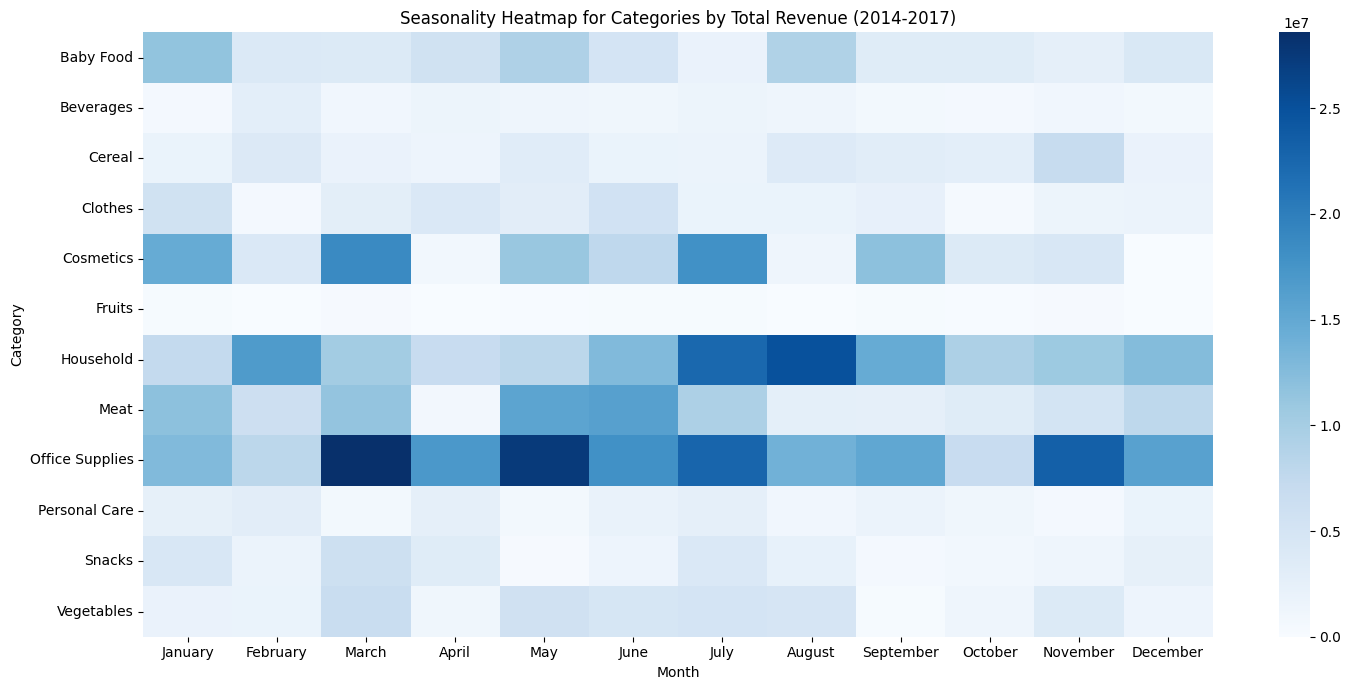

In [ ]:
month_order = ["January", "February", "March", "April", "May", "June",
               "July", "August", "September", "October", "November", "December"]

# Add column to dataframe 2014 - 2017 years "month"
df_years = df_years.copy()
df_years["month"] = pd.Categorical(
    df_years["order_date"].dt.month_name(),
    categories=month_order,
    ordered=True
)

# Pivot for heatmap: categories × months
pivot_heatmap_revenue = pd.pivot_table(
    df_years,
    values="total_revenue",
    index="category",
    columns="month",
    aggfunc="sum",
    observed=False
)


plt.figure(figsize=(15,7))
sns.heatmap(pivot_heatmap_revenue, annot=False, cmap="Blues")

plt.title("Seasonality Heatmap for Categories by Total Revenue (2014-2017)")
plt.xlabel("Month")
plt.ylabel("Category")


plt.tight_layout()
plt.show()


In [ ]:
print(pivot_heatmap_revenue)

month                January     February        March        April  \
category                                                              
Baby Food        11525892.00   4121750.88   3876426.80   5603396.00   
Beverages          629946.20   2868447.40   1078443.60   1651781.95   
Cereal            1813862.60   3963839.00   1915684.10   1542750.00   
Clothes           5653600.80    653931.52   2966733.44   4238861.92   
Cosmetics        14686859.60   4237779.60  18706039.20    935170.80   
Fruits             332269.29     86003.94    360417.90    109879.41   
Household         7354979.62  16668658.61  10275987.79   6862464.63   
Meat             11902360.68   6251987.91  11447141.37    853061.58   
Office Supplies  12757203.90   8073701.58  28589421.42  16999185.84   
Personal Care     2468981.57   3031202.24    711377.92   2667422.01   
Snacks            4503246.12   1718508.54   6106404.18   3403602.06   
Vegetables        1970119.28   1869980.28   6722254.04   1226471.66   

month

### **Seasonality Analysis of Products Based on Total Revenue.**
1. **Office Supplies**

* Clearly driven by business procurement cycles.
* Marketing efforts should focus on Feb–Mar and Apr–May months.
* Increase inventory before high-demand periods.

2. **Household & Cosmetics**
* These categories show multi-peak seasonal patterns.
* Plan promotional campaigns in late winter and mid-summer.

3. **Meat**
* Strong summer demand → prepare for seasonal surge.
* Marketing around summer barbecue themes is effective.

4. **Stable-demand categories (Cereal, Fruits, Vegetables, etc.)**

* These categories rely more on price competitiveness and distribution reliability, not seasonality.
* Focus on continuous supply chain efficiency.

---

### **1. Most Profitable Categories**

 **Office Supplies — the main revenue driver**

* Peaks in **March, May, September, November, December**
* High revenue due to **B2B corporate orders and high-ticket items**
  →  *The most critical category for the business.*

 **Household — strong seasonal revenue**

* Peaks in **June–August** (summer repairs and home upgrades)
  →  *A major revenue source during summer months.*

 **Cosmetics — stable and premium**

* Peaks in **March, June–July, November**
  →  *High potential for growth through premium lines.*

---

### **2. High-volume but low-revenue categories**

 **Beverages, Vegetables, Fruits, Personal Care**

* High order volume but low average price → low revenue.
  →  *Consume operational resources without generating significant profit.*

**Snacks, Cereal**

* Minimal contribution to revenue.
  →  *Kept mainly for assortment breadth.*

---

### **3. Key Strategic Contrasts**

| Category                        | Volume | Revenue   | Conclusion               |
| ------------------------------- | ------ | --------- | ------------------------ |
| Office Supplies                 | Medium | ⭐ Highest | B2B, high-ticket items   |
| Household                       | Medium | ⭐ High    | Seasonal large purchases |
| Cosmetics                       | Medium | 🔥 High   | Premium products         |
| Beverages / Fruits / Vegetables | High   | ⚠️ Low    | Low-margin essentials    |
| Baby Food                       | High   | Medium    | Stable category          |

---

### **4. Strategic Insights**

**A. Focus on the categories that generate real money**

* Office Supplies
* Household
* Cosmetics
   
   → *These are the revenue core. Invest and scale.*

---

**B. Re-evaluate low-revenue categories**

* Beverages, Vegetables, Fruits, Personal Care
   
   → *Increase prices by 10-15% or introduce a minimum order amount.*

---

###**C. Seasonal revenue strategy**

* **March** — strongest month of the year (Office Supplies, Cosmetics)
* **Summer (June-August)** - Household
* **November-December** - Office Supplies, Household, Cosmetics
  
   → *Plan marketing and inventory around these peaks.*

---

### **D. Strengthen the B2B segment**

Office Supplies shows that corporate clients drive
the highest revenue.

 → *Introduce special conditions, account managers, automated reorders.*

---

### **Conclusion**

**The business relies heavily on high-volume, low-margin categories, but most profit comes from Office Supplies, Household, and Cosmetics.**

 **Strategy: reduce emphasis on low-revenue categories and increase investment in premium and B2B-focused segments.**



